# Funções

In [235]:
def get_frequencias(dados):
    conjunto = set(dados) # Sem repetições
    frequencias = {} 
    for c in conjunto:
        frequencias[c] = len([x for x in dados if x == c]) # contagens
    frequencias = dict(sorted(frequencias.items())) # ordem alfabética
    return frequencias

In [236]:
def get_frequencias_relativas(dados):
    frequencias = {}
    n = len(dados)
    for k, v in get_frequencias(dados).items():
        frequencias[k] = v/n
    return frequencias

In [237]:
def get_frequencias_relativas_acumuladas(dados):
    frequencias = {}
    acumulado = 0 
    for k,v in get_frequencias_relativas(dados).items():
        acumulado += v 
        frequencias[k] = acumulado
    return frequencias

In [238]:
def get_frequencias_acumuladas(dados):
    frequencias = {}
    acumulado = 0 
    for k,v in get_frequencias(dados).items():
        acumulado += v 
        frequencias[k] = acumulado
    return frequencias

In [239]:
def barplot(L, title="",xlabel="", ylabel="" ):
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.bar(L.keys(), L.values())

In [240]:
def get_precisao(number):
    s = str(number)
    if '.' in s:
        return 10**(-len(s.split('.')[-1]))/2
    return 1/2

def barplot_continuo(L,title="",xlabel="", ylabel="" ):
    import matplotlib.pyplot as plt
    import numpy as np
    y = L.values()
    # Considerando todas as precisões iguais
    # TODO: Considerar listas de amplitudes
    k = min([get_precisao(i) for i in y])

    x = L.keys() # considerando que todas as variáveis contínuas são qualitativas...
    # 1.0 1.1 1.2 0.05
    x = np.linspace(min(x), max(x), (max(x)-min(x))//k)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.bar(x, y)

In [ ]:
def get_precisao(number):
    # Calcula a metade da menor unidade representada (precisão)
    s = str(number)
    if '.' in s:
        return 10**(-len(s.split('.')[-1])) / 2
    return 1/2

def barplot_continuo(L, title="", xlabel="", ylabel="", amplitudes_classes=None):
    """
    Está ruim!
    Refazer...
    Gera um barplot (histograma simplificado) a partir de uma distribuição de frequência.

    Args:
        L (dict): Dicionário onde as chaves são os limites superiores das classes
                  e os valores são as frequências (ex: {10: 5, 20: 8, 30: 2}).
        title (str): Título do gráfico.
        xlabel (str): Rótulo do eixo x.
        ylabel (str): Rótulo do eixo y (frequência).
        amplitudes_classes (float ou list, optional): Tamanhos das classes.
            - Se for um único valor (float), todas as classes terão essa amplitude.
            - Se for uma lista, deve ter o mesmo número de classes que L.
            - Se for None, a amplitude será calculada pela diferença entre as chaves de L.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Ordenar as chaves (limites superiores das classes)
    limites_sup = sorted(L.keys())
    # Frequências (alturas das barras)
    frequencias = [L[limite] for limite in limites_sup]
    
    # Se não há dados, retorna
    if not limites_sup:
        print("Erro: A lista de dados (L) está vazia.")
        return

    # Determinar os limites inferiores e as amplitudes
    
    # O primeiro limite inferior é o primeiro limite superior menos a primeira amplitude.
    # Se amplitudes não forem fornecidas, a primeira amplitude é estimada pela diferença
    # entre os dois primeiros limites superiores (se houver pelo menos dois).
    
    if amplitudes_classes is None:
        if len(limites_sup) < 2:
            # Caso de apenas uma classe, é difícil determinar a amplitude,
            # usaremos um valor padrão (ex: 1) ou a precisão.
            k = get_precisao(limites_sup[0]) * 2  # A precisão da primeira chave é a menor unidade
            amplitudes = [k]
            print(f"Aviso: Apenas uma classe. Usando amplitude padrão: {k}")
        else:
            amplitudes = [limites_sup[i] - limites_sup[i-1] for i in range(1, len(limites_sup))]
            # Supondo que a amplitude da primeira classe seja igual à segunda
            amplitudes.insert(0, amplitudes[0])

    elif isinstance(amplitudes_classes, (int, float)):
        # Único valor: todas as amplitudes são iguais
        amplitudes = [amplitudes_classes] * len(limites_sup)
    
    elif isinstance(amplitudes_classes, list):
        # Lista de amplitudes: validação do tamanho
        if len(amplitudes_classes) != len(limites_sup):
            print(f"Erro: O tamanho da lista de amplitudes ({len(amplitudes_classes)}) não é compatível "
                  f"com o número de classes ({len(limites_sup)}).")
            return
        amplitudes = amplitudes_classes
    
    else:
        print("Erro: 'amplitudes_classes' deve ser um número, uma lista ou None.")
        return

    # Calcular os limites inferiores
    limites_inf = [limites_sup[i] - amplitudes[i] for i in range(len(limites_sup))]
    
    # Calcular o ponto médio da classe (onde a barra será centralizada)
    pontos_medios = [(limites_inf[i] + limites_sup[i]) / 2 for i in range(len(limites_sup))]

    # --- Plotagem ---
    
    plt.figure()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    # O 'width' do barplot será a amplitude da classe
    # O 'x' será o ponto médio da classe
    plt.bar(pontos_medios, frequencias, width=amplitudes, edgecolor='black', alpha=0.7)
    
    # Ajustar os limites do eixo x para cobrir todas as classes
    min_x = limites_inf[0]
    max_x = limites_sup[-1]
    plt.xlim(min_x, max_x)
    
    # Adicionar os limites das classes como ticks no eixo x para clareza
    ticks_x = sorted(list(set(limites_inf + limites_sup)))
    plt.xticks(ticks_x, [f'{t:.2f}' for t in ticks_x], rotation=45, ha='right')

    plt.grid(axis='y', linestyle='--')
    plt.tight_layout() # Para ajustar rótulos que podem sair da área do gráfico
    plt.show()



In [242]:
def circular_plot(L, title=""):
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots(figsize=(6, 6))
    # Create the pie chart (outer part of the donut)
    wedges, texts, autotexts = ax.pie(L.keys(), labels=L.values(),
                                    autopct='%1.1f%%', startangle=90,
                                    pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal')

    # Set title
    ax.set_title(title)

In [296]:
def poligono_frequencias_acumuladas(L, title="", xlabel="", ylabel="", k=None):
    """
    Gera o polígono de frequências acumuladas a partir de uma distribuição de frequência,
    assegurando que a linha seja plotada nos pontos médios das classes.

    Args:
        L (dict): Dicionário onde as chaves são os pontos médios das classes
                  e os valores são as frequências. (deve vir ordenado)
        title (str): Título do gráfico.
        xlabel (str): Rótulo do eixo x.
        ylabel (str): Rótulo do eixo y (frequência).
        h (int ou list(int)) é a amplitude da classe
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    x = []
    for i in range(int(min(L.keys())) , int(max(L.keys())) + 1):
        x.append(i) 
    
    y = [0]*(len(x))

    #print(x)
    #print(y)
    #print(L)
    ultimo = 0
    for i in range(len(x)):
        #print(y, i, ultimo)
        try:
            y[i] = L[i+int(min(L.keys()))]
            ultimo = y[i]
        except KeyError:
            y[i] = ultimo 
    
    # Plota a linha do polígono
    plt.plot(x, y, marker='o', linestyle='-', color='blue')
    
    # Adiciona os pontos médios das classes reais para destaque
    plt.scatter(x, y, color='red', zorder=5)

    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.ylim(bottom=0)
    
    # Define os ticks do eixo X para serem os pontos médios e os limites
    #ticks_x = sorted(list(set(pontos_medios_poligono + limites_inf + limites_sup)))
    #plt.xticks(ticks_x, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


In [309]:
def poligono_frequencias(L, title="", xlabel="", ylabel="", k=None):
    """
    Gera o polígono de frequências a partir de uma distribuição de frequência,
    assegurando que a linha seja plotada nos pontos médios das classes.

    Args:
        L (dict): Dicionário onde as chaves são os pontos médios das classes
                  e os valores são as frequências. (deve vir ordenado)
        title (str): Título do gráfico.
        xlabel (str): Rótulo do eixo x.
        ylabel (str): Rótulo do eixo y (frequência).
        h (int ou list(int)) é a amplitude da classe
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    x = range(int(min(L.keys())) , int(max(L.keys())) + 1)
    y = [0]*len(x)

    for i in range(len(x)):
        try:
            y[i] = L[i+int(min(L.keys()))]
        except KeyError:
            y[i] = 0 
    
    # Plota a linha do polígono
    plt.plot(x, y, marker='o', linestyle='-', color='blue')
    
    # Adiciona os pontos médios das classes reais para destaque
    plt.scatter(x, y, color='red', zorder=5)

    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.ylim(bottom=0)
    
    # Define os ticks do eixo X para serem os pontos médios e os limites
    #ticks_x = sorted(list(set(pontos_medios_poligono + limites_inf + limites_sup)))
    #plt.xticks(ticks_x, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Testes

In [245]:
get_frequencias(['Uva','Uva','Uva','Uva','Uva','Manga','Manga','Manga','Manga', 'Abacaxi'])

{'Abacaxi': 1, 'Manga': 4, 'Uva': 5}

$$
\sum_{i=1}^{k}f_i=n
$$

In [246]:
l = [2,3,4,5,1,2,3,4,4,4,5]
L = get_frequencias(l)
print(L)
print(len(l)==sum(L.values())) #o somatório das frequências está dando n ?

{1: 1, 2: 2, 3: 2, 4: 4, 5: 2}
True


In [247]:
get_frequencias_relativas(['Uva','Uva','Uva','Uva','Uva','Manga','Manga','Manga','Manga', 'Abacaxi'])

{'Abacaxi': 0.1, 'Manga': 0.4, 'Uva': 0.5}

In [248]:
l = [2,3,4,5,1,2,3,4,4,4,5]
L = get_frequencias_relativas(l)
print(L)
print(sum(L.values())==1) #o somatório das frequências está dando n ?

{1: 0.09090909090909091, 2: 0.18181818181818182, 3: 0.18181818181818182, 4: 0.36363636363636365, 5: 0.18181818181818182}
True


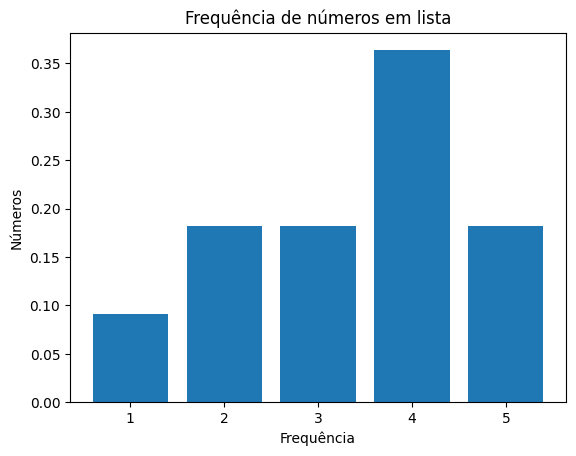

In [249]:
l = [2,3,4,5,1,2,3,4,4,4,5]
L = get_frequencias_relativas(l)

barplot(L, "Frequência de números em lista", "Frequência","Números" )


In [250]:
get_frequencias_relativas_acumuladas(l)

{1: 0.09090909090909091,
 2: 0.2727272727272727,
 3: 0.45454545454545453,
 4: 0.8181818181818181,
 5: 1.0}

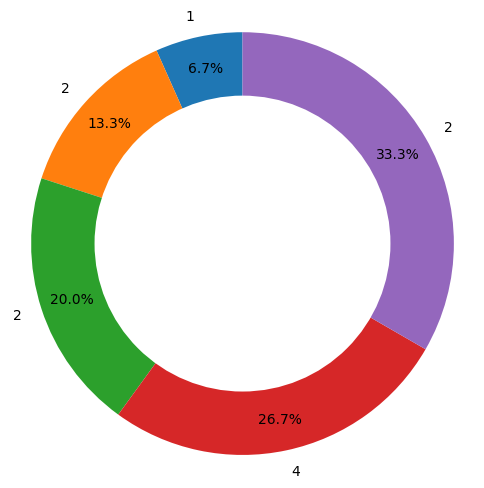

In [251]:
circular_plot(get_frequencias(l))

# Exemplos do capítulo 2

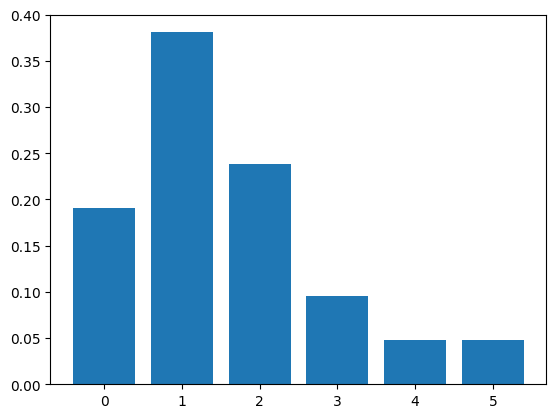

In [252]:
dados_pag_11 = [2,4,2,1,2,3,1,0,5,1,0,1,1,1,2,0,1,3,0,1,2]
f_pag_11 = get_frequencias_relativas(dados_pag_11)
barplot(f_pag_11)

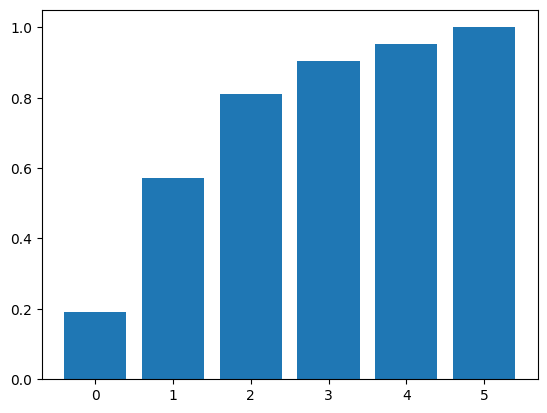

In [253]:
freq_acuml_pag_12 = get_frequencias_relativas_acumuladas(dados_pag_11)
barplot(freq_acuml_pag_12)

{21.2: 1, 21.3: 2, 21.4: 5, 21.5: 7, 21.6: 4, 21.7: 3, 21.8: 1, 21.9: 2}
{21.2: 0.04, 21.3: 0.08, 21.4: 0.2, 21.5: 0.28, 21.6: 0.16, 21.7: 0.12, 21.8: 0.04, 21.9: 0.08}
{21.2: 1, 21.3: 3, 21.4: 8, 21.5: 15, 21.6: 19, 21.7: 22, 21.8: 23, 21.9: 25}
{21.2: 0.04, 21.3: 0.12, 21.4: 0.32, 21.5: 0.6000000000000001, 21.6: 0.7600000000000001, 21.7: 0.8800000000000001, 21.8: 0.9200000000000002, 21.9: 1.0000000000000002}


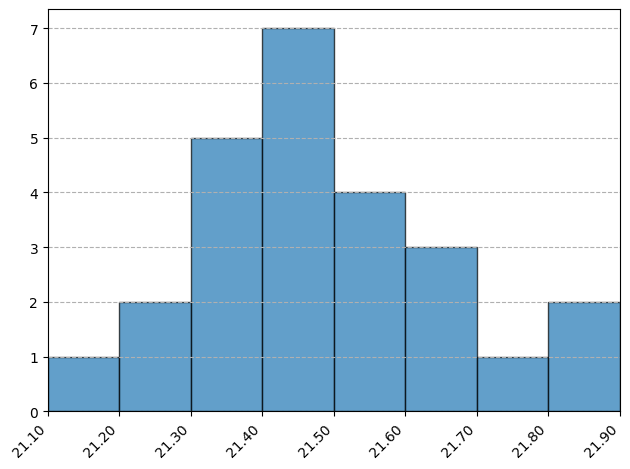

In [254]:
dados_pag_13 = [21.5, 21.4, 21.8, 21.5, 21.6, 
                21.7, 21.6, 21.4, 21.2, 21.7, 
                21.3, 21.5, 21.7, 21.4, 21.4, 
                21.5, 21.9, 21.6, 21.3, 21.5, 
                21.4, 21.5, 21.6, 21.9, 21.5]
print(get_frequencias(dados_pag_13))
print(get_frequencias_relativas(dados_pag_13))

print(get_frequencias_acumuladas(dados_pag_13))
print(get_frequencias_relativas_acumuladas(dados_pag_13))
barplot_continuo(get_frequencias(dados_pag_13))

TypeError: 'float' object cannot be interpreted as an integer

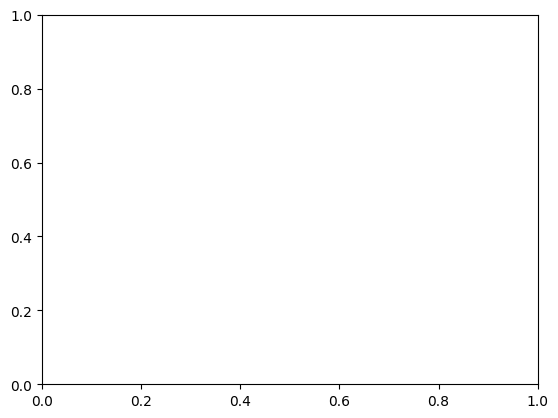

In [255]:
poligono_frequencias(get_frequencias(dados_pag_13))

{21.2: 0.04, 21.3: 0.12, 21.4: 0.32, 21.5: 0.6000000000000001, 21.6: 0.7600000000000001, 21.7: 0.8800000000000001, 21.8: 0.9200000000000002, 21.9: 1.0000000000000002}


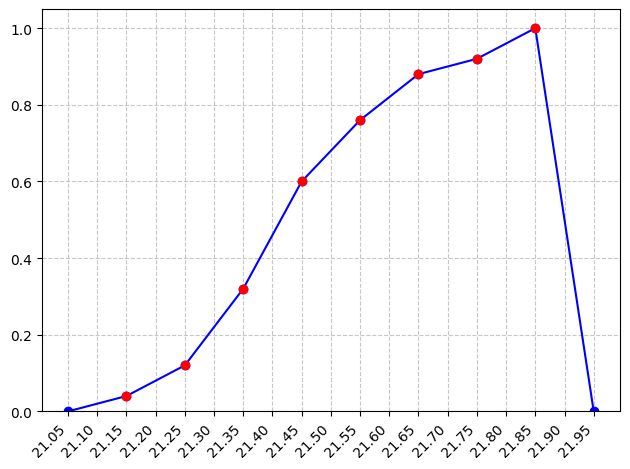

In [ ]:
print(get_frequencias_relativas_acumuladas(dados_pag_13))
poligono_frequencias(get_frequencias_relativas_acumuladas(dados_pag_13))

# Execícos de Aplicação 2.2.4

## 1.

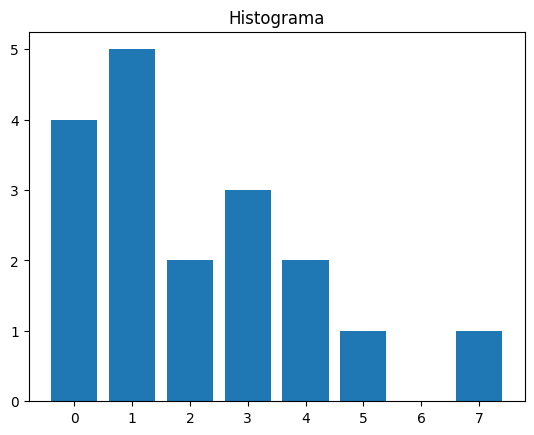

In [ ]:
dados_pag_19_1 = [1,4,0,1,1,7,3,2,0,
                  0,1,4,0,5,2,1,3,3]
barplot(get_frequencias(dados_pag_19_1), title="Histograma")

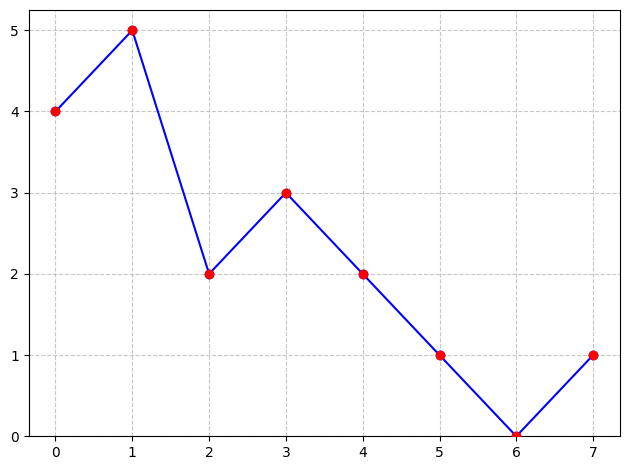

In [ ]:
poligono_frequencias(get_frequencias(dados_pag_19_1))

{0: 4, 1: 9, 2: 11, 3: 14, 4: 16, 5: 17, 7: 18}


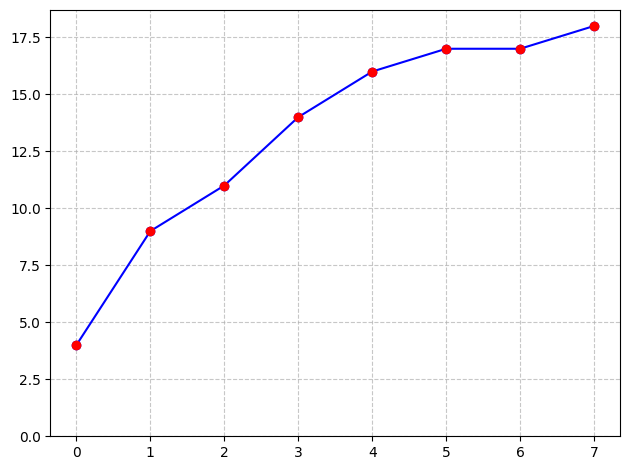

In [259]:
print(get_frequencias_acumuladas(dados_pag_19_1))
poligono_frequencias_acumuladas(get_frequencias_acumuladas(dados_pag_19_1))

## 2.

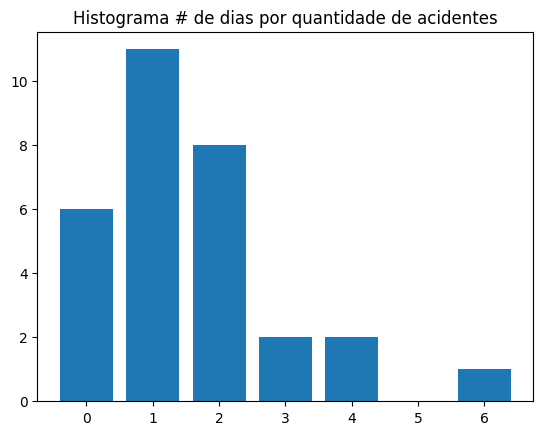

In [261]:
dados_pag_19_2 = [2,0,1,2,3,1,6,1,0,0,
                  1,2,2,1,2,0,1,4,2,3,
                  0,1,0,2,1,2,4,1,1,1]
barplot(get_frequencias(dados_pag_19_2), title="Histograma # de dias por quantidade de acidentes")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[2, 0, 1, 2, 3, 1, 6, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 4, 2, 3, 0, 1, 0, 2, 1, 2, 4, 1, 1, 1]


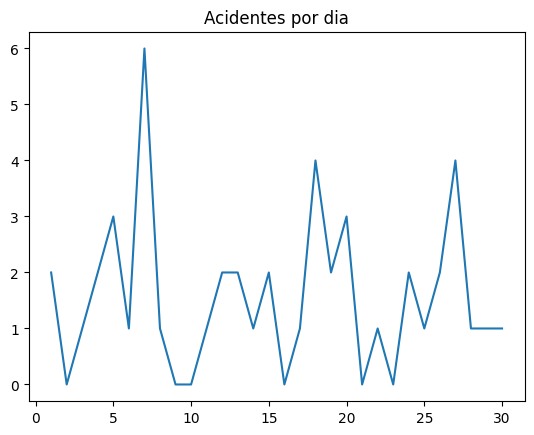

In [ ]:
import matplotlib.pyplot as plt
x = [i +1 for i in range(len(dados_pag_19_2))]
plt.title("Acidentes por dia")
plt.plot(x, dados_pag_19_2)

## 3.

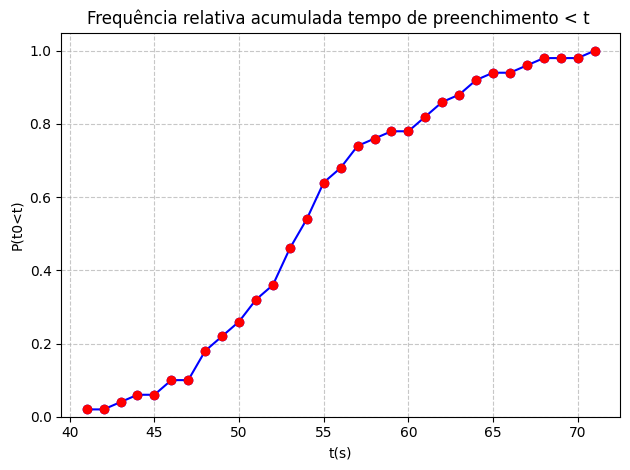

In [300]:
dados_tabela_2_6 = [
    61, 52, 53, 48, 55,
    65, 53, 56, 54, 46,
    43, 62, 48, 57, 57,
    53, 49, 50, 41, 54,
    55, 68, 61, 54, 48,
    51, 51, 44, 71, 63,
    58, 50, 64, 57, 49,
    55, 67, 53, 53, 55,
    59, 62, 54, 46, 52,
    56, 64, 55, 48, 51]
poligono_frequencias_acumuladas(get_frequencias_relativas_acumuladas(dados_tabela_2_6), title="Frequência relativa acumulada tempo de preenchimento < t ", xlabel="t(s)", ylabel="P(t0<t)")

## 4.

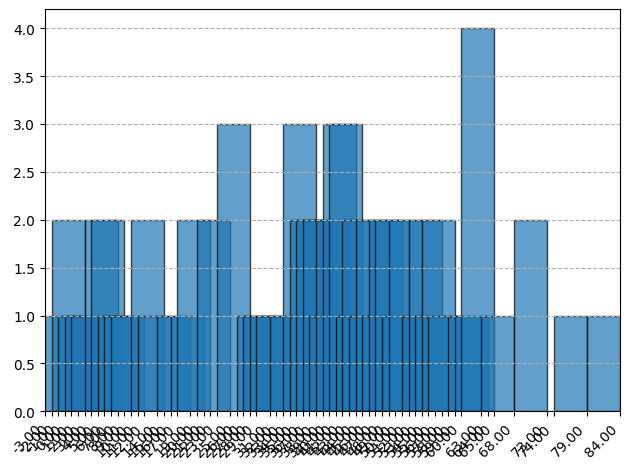

In [302]:
dados_pag_19_4 = [
    64, 51, 28, 57, 8, 15, 59, 52,
    73, 36, 38, 25, 3, 28, 8,  63,
    44, 47, 42, 39, 65, 48, 54, 40,
    10, 45, 49, 2,  50, 47, 84, 16,
    43, 65, 19, 40, 38, 68, 45, 52,
    31, 79, 49, 22, 9,  6,  39, 44,
    51, 58, 65, 5,  56, 34, 41, 46,
    4,  45, 32, 60, 21, 12, 43, 59,
    25, 54, 33, 44, 9,  65, 41, 22,
    53, 73, 11, 3,  57, 28, 38, 15
]
barplot_continuo(get_frequencias(dados_pag_19_4), amplitudes_classes=5)

IndexError: list assignment index out of range

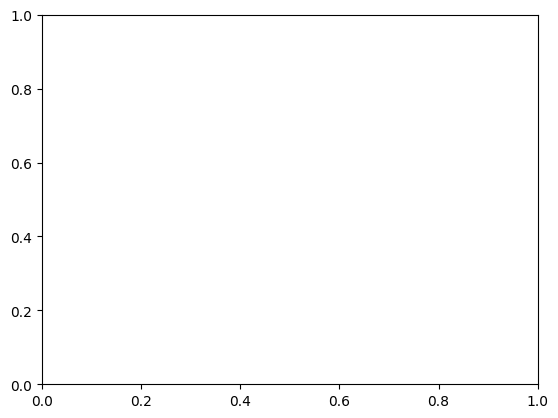

In [306]:
poligono_frequencias(get_frequencias(dados_pag_19_4))